**Name:** Hamidreza Amirzadeh

**Student Number:** 401206999

**Note:** This work was done under collabration with Mr.Abdollahi


# Neural-Network with Numpy

In this notebook, you are going to write and implement all the components required to create and train a two-layered neural network using NumPy.

## Imports & Seeding:

Importing some common libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(123)
%matplotlib inline

## Preparing the data

You'll train and evaluate your model on [Fashion MNIST](https://en.wikipedia.org/wiki/Fashion_MNIST) dataset. In this section, you'll download Fashion MNIST and split it into training and testing datasets.

In [18]:
from sklearn.datasets import fetch_openml



# Using `fetch_openml`, download `Fashion-MNIST` 
# and save the training data and labels in `X` and `y` respectively.
#############################
# Your code goes here (5 points)
fmnist_dataset = fetch_openml(name="Fashion-MNIST", version=1)
data = fmnist_dataset.data
target = fmnist_dataset.target
X = data.to_numpy()
y = target.to_numpy()
#############################

# Normalization:
X = ((X / 255.) - .5) * 2

print(X.shape, y.shape)

(70000, 784) (70000,)


In [19]:
from sklearn.model_selection import train_test_split

# Using `train_test_split`, split your data into two sets. 
# Set the test_size to 10000

#############################
# Your code goes here (6 points)
x_train, x_test, y_train, y_test = train_test_split(X, y)
#############################

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(52500, 784) (52500,) (17500, 784) (17500,)


## Prepare training & validation sets

We'll use only 3 classes from Fashion MNIST: Trouser, T-shirt, and Sneaker classes.

The class labels for T-shirt, Trouser, and Sneaker are 0, 1, and 7 respectively.

In this part, you'll limit the testing and training sets to only these three classes.

In [21]:
# Modify `y_train` and `x_train`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
bool_0 = y_train=='0'
bool_1 = y_train=='1'
bool_7 = y_train=='7'
bool_all = bool_0 | bool_1 | bool_7

x_train = x_train[bool_all, :]
y_train = y_train[bool_all]
#############################

print(x_train.shape, y_train.shape)

(15697, 784) (15697,)


In [22]:
# Modify `y_test` and `x_test`.
# Only keep the 3 classes mentioned above. 
#############################
# Your code goes here (4 points)
bool_0 = y_test=='0'
bool_1 = y_test=='1'
bool_7 = y_test=='7'
bool_all = bool_0 | bool_1 | bool_7

x_test = x_test[bool_all, :]
y_test = y_test[bool_all]
#############################

print(x_test.shape, y_test.shape)

In [ ]:
y_train[y_train =='0'] = 0
y_train[y_train =='1'] = 1
y_train[y_train =='7'] = 2

y_test[y_test =='0'] = 0
y_test[y_test =='1'] = 1
y_test[y_test =='7'] = 2

## Linear & Activation Functions

In this part, you'll implement the forward and backward process for the following components:
- Softmax Layer
- Linear Layer
- ReLU Layer
- Sigmoid Layer

### The `Softmax` Layer

In [23]:
class SoftMaxLayer(object):
    def __init__(self):
        self.inp = None
        self.output = None

    def forward(self, x):
        
        # Write the forward pass for softmax.
        # Save the values required for the backward pass.
        #############################
        # Your code goes here (4 points)
        assert len(x.shape) == 2
        s = np.max(x, axis=1)
        s = s[:, np.newaxis]
        e_x = np.exp(x - s)
        div = np.sum(e_x, axis=1)
        div = div[:, np.newaxis]
        self.output = e_x / div
        return self.output
        #############################

    def backward(self, up_grad,y):
        # Write the backward pass for softmax.
        #############################
        # Your code goes here (4 points)
        for i in range(len(self.output)):
          self.output[i][np.argmax(y[i])]-=1
        return self.output
        #############################


    def step(self, optimizer):
      pass

### The `Linear` Layer 

In [24]:
class Linear:
    def __init__(self, in_dim, out_dim):
        # Initialize the layer's weights and biases
        #############################
        # Your code goes here (2 points)
        self.weights = (np.random.rand(in_dim, out_dim)-0.5) * 0.2
        self.bias = (np.random.rand(1, out_dim) - 0.5 ) * 0.2        
        #############################
        self.dw = None
        self.db = None
        
    def forward(self, inp):
        # Compute linear layer's output.
        # Save the value(s) required for the backward phase.
        #############################
        # Your code goes here (4 points)
        z = np.dot(inp , self.weights) + self.bias
        #############################
        
        return z
    
    def backward(self, input ,up_grad):
        # Calculate the gradient with respect to the weights 
        # and biases and save the results.
        #############################
        # Your code goes here (6 points)
        down_grad = np.dot(up_grad, self.weights.T)
        batchSize = input.shape[1]
        biasMatrixShape = (self.bias.shape[0], self.bias.shape[1])
        updateOfWeights = np.dot(input.T, up_grad)/batchSize
        updateOfbias =  np.mean(up_grad, axis=0).reshape(biasMatrixShape)
        self.dw = updateOfWeights
        self.db = updateOfbias
        #############################
        return down_grad

    def step(self, optimizer):
      # Update the layer's weights and biases
      # Update previous_w_update and previous_b_update accordingly
      #############################
      # Your code goes here (5 points)
      self.weights = optimizer.get_next_update(self.weights ,self.dw )
      self.bias = optimizer.get_next_update(self.bias ,self.db )
      #############################

### The `ReLU` Layer

In [25]:
class RelU:
    def __init__(self ):
        self.inp = None

    def forward(self, inp):
        # Write the forward pass for ReLU.
        # Save the value(s) required for the backward pass.
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        output =  self.inp * (self.inp > 0)
        #############################
        return output
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        def reluDerivative(x):
            x[x<=0] = 0
            x[x>0] = 1
            return x
        down_grad =  reluDerivative(self.inp) * up_grad
        #############################
        return down_grad

    def step(self, optimizer):
      pass

### The `sigmoid` Layer

In [26]:
class Sigmoid:
    def forward(self, inp):
        #############################
        # Your code goes here (4 points)
        self.inp = inp
        self.out =  1.0 / (1 + np.exp(-self.inp))
        #############################
        return self.out
    
    def backward(self, up_grad):
        #############################
        # Your code goes here (4 points)
        down_grad =  (1.0 / (1 + np.exp(-self.inp))) * (1 - (1.0 / (1 + np.exp(-self.inp)))) * up_grad
        #############################
        return down_grad
    
    def step(self, optimizer):
      pass

## `Loss` function :

For this task we are going to use the [Cross-Entropy Loss](https://en.wikipedia.org/wiki/Cross_entropy).

In [33]:
class CELoss():
    def __init__(self):
      pass

    def forward(self, pred, target):
        
        self.yhat = pred
        self.y = target

        # Commpute and return the loss 
        #############################
        # Your code goes here (8 points)
        lossData = []
        for i in range(len(self.yhat)):
          output = self.yhat[i][np.argmax(self.y[i])]
          lossData.append(-np.log(output))
        loss = np.mean(lossData)
        return loss
        #############################
        
    
    def backward(self):
        # Derivative of loss_fn with respect to a the predicted label.
        # Use `self.y` and `self.yhat` to compute and return `grad`.
        #############################
        # Your code goes here (6 points)
        grad = []
        for i in range(len(self.yhat)):
            grad.append(-(1/self.yhat[i][np.argmax(self.y[i])]))
        grad = np.array(grad)
        #############################
        return grad

## Optimizer

In this section, you'll implement an optimizer classes


In [28]:
class GradientDescent(object):
    def __init__(self, lr):
        self.lr = lr

    def get_next_update(self, x, dx):
        # Compute the new value for 'x' and return the result
        #############################
        # Your code goes here (2 points)
        return x - (self.lr * dx)
        #############################

## The Model
Now you'll write the base class for a multi-layer perceptron network.

In [36]:
class MLP:
    def __init__(self, layers, loss_fn, optimizer):
      
        self.layers = layers 
        self.losses  = [] 
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.activations = []

    def forward(self, inp):
        # Pass `inp` to all the layers sequentially
        # and return the result.
        #############################
        # Your code goes here (4 points)
        self.activations = [inp]
        for i in range(len(self.layers)):
          self.activations.append(self.layers[i].forward(self.activations[-1]))
        return self.activations
        #############################
        
    def loss(self, pred, label):
        loss = self.loss_fn.forward(pred, label)
        self.losses.append(loss)
        return loss

    def predict(self, X):
        Y = self.forward(X)[-1]
        return Y.argmax(axis=-1)

    def backward(self , y):
        # Start with loss function's gradient and 
        # do the backward pass on all the layers.
        #############################
        # Your code goes here (5 points)
        loss = self.loss(self.activations[-1], y) 
        loss_grad = self.loss_fn.backward()
        loss_grad = self.layers[5].backward(loss_grad , y)
        loss_grad = self.layers[4].backward( self.activations[-3], loss_grad)
        loss_grad = self.layers[3].backward(loss_grad)
        loss_grad = self.layers[2].backward( self.activations[-5] , loss_grad)
        loss_grad = self.layers[1].backward(loss_grad)
        loss_grad = self.layers[0].backward( self.activations[-7] , loss_grad)
        return np.mean(loss)
        #############################
        
    def update(self):
        for layer in self.layers:
          layer.step(self.optimizer)

The following cell encodes training labels into a one-hot representation with 3 classes.

In [30]:
def onehot_enc(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary
y_train = onehot_enc(y_train, 3)

In [31]:
def train(model, epochs, x, y):
    for n in range(epochs):
      # First do the forward pass. Next, compute the loss.
      # Then do the backward pass and finally, update the parameters.
      #############################
      # Your code goes here (4 points)
      model.forward(x)
      loss = model.backward(y)
      model.update()
      #############################
      print(f"Loss at {n}: {loss:.3f}")

In [42]:
# Instantiate the `MLP` with the following structure:
#     Linear with 50 units --> ReLU --> Linear with 50 units --> ReLU --> Linear with 3 units --> Sigmoid --> Softmax
# Use GradientDescent as the optimizer, set the learning rate to 0.001, and use CELoss as the loss function.
#############################
# Your code goes here (4 points)
model = MLP([Linear(784,50), Sigmoid(), Linear(50,50), Sigmoid(), Linear(50,3), SoftMaxLayer()], CELoss(), GradientDescent(0.01))
#############################

epochs = 1000

# Train the network using only `x_train` and `y_train` (no validation)
train(model, epochs, x_train, y_train)

Loss at 0: 1.107
Loss at 1: 1.888
Loss at 2: 8.266
Loss at 3: 1.074
Loss at 4: 1.070
Loss at 5: 1.064
Loss at 6: 1.056
Loss at 7: 1.045
Loss at 8: 1.031
Loss at 9: 1.013
Loss at 10: 0.993
Loss at 11: 0.975
Loss at 12: 0.960
Loss at 13: 0.949
Loss at 14: 0.940
Loss at 15: 0.932
Loss at 16: 0.925
Loss at 17: 0.919
Loss at 18: 0.914
Loss at 19: 0.908
Loss at 20: 0.904
Loss at 21: 0.899
Loss at 22: 0.895
Loss at 23: 0.890
Loss at 24: 0.886
Loss at 25: 0.882
Loss at 26: 0.878
Loss at 27: 0.875
Loss at 28: 0.871
Loss at 29: 0.867
Loss at 30: 0.863
Loss at 31: 0.860
Loss at 32: 0.856
Loss at 33: 0.853
Loss at 34: 0.849
Loss at 35: 0.846
Loss at 36: 0.843
Loss at 37: 0.839
Loss at 38: 0.836
Loss at 39: 0.833
Loss at 40: 0.830
Loss at 41: 0.826
Loss at 42: 0.823
Loss at 43: 0.820
Loss at 44: 0.817
Loss at 45: 0.815
Loss at 46: 0.812
Loss at 47: 0.809
Loss at 48: 0.806
Loss at 49: 0.804
Loss at 50: 0.801
Loss at 51: 0.799
Loss at 52: 0.797
Loss at 53: 0.794
Loss at 54: 0.792
Loss at 55: 0.790
Lo

Let's plot the loss value for each iteration

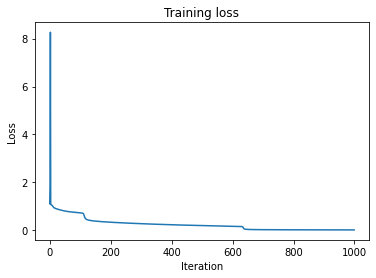

In [43]:
plt.plot(model.losses)
plt.title("Training loss")
plt.xlabel("Iteration")
plt.ylabel("Loss");

**Let's also check our model's performance using the `accuracy` metric on the `testing` dataset**

In [44]:
# Compute the accuracy on the testing set
#############################
# Your code goes here (7 points)
predicted = model.predict(x_test)
correctCount = 0
for label in range(len(predicted)):
  if predicted[label] == y_test[label]:
    correctCount+=1
acc = correctCount/len(y_test)
#############################

print(acc)

0.9922685272487272
